In [2]:
using  Plots, Optim, Dates, DiffEqParamEstim, Flux, DiffEqFlux, OrdinaryDiffEq

In [5]:
st = 600
x = [-165,-163,-158,-156,-151,-148,-145,-148,-148,-142,-137,-138,-133,-130,-126,-122,-120,-126,-123,-116,-104,-101,-92,-86,-75,-65,-54,-46,-46,-44,-46,-40,-47,-48,-45,-43,-42,-43,-50,-54,-56,-60,-61,-64,-63,-64,-62,-66,-64,-64,-77,-81,-79,-75,-77,-73,-67,-63,-60,-50,-36,-24,-11,2,11,22,31,40,44,44,36,16,-5,-35,-60,-72,-82,-85,-93,-96,-97,-98,-97,-87,-85,-88,-87,-88,-90,-92,-91,-94,-104,-110,-105,-110,-106,-100,-97,-90,-90,-83,-81,-78,-67,-40,4,74,154,226,292,348,368,341,285,226,135,7,-121,-249,-377,-453,-388,-317,-251,-194,-157,-143,-145,-138,-143,-146,-151,-149,-151,-157,-158,-156,-155,-162,-165,-165,-155,-155,-158,-164,-160,-160,-158,-158,-154,-150,-153,-144,-134,-137,-135,-140,-133,-135,-135,-128,-127,-120,-112,-103,-96,-84,-71,-59,-48,-45,-42,-43,-42,-44,-47,-48,-51,-53,-55,-52,-53,-53,-58,-56,-57,-60,-58,-58,-64,-60,-64,-63,-65,-62,-70,-68,-72,-71,-68,-61,-56,-43,-32,-21,-5,6,18,28,36,38,44,54,55,45,30,4,-23,-47,-59,-71,-75,-73,-82,-75,-79,-69,-60,-57,-58,-64,-66,-69,-68,-73,-77,-74,-76,-76,-72,-68,-63,-67,-74,-70,-70,-59,-55,-40,-12,45,123,203,276,339,383,384,343,285,202,74,-54,-182,-310,-438,-404,-323,-254,-200,-164,-149,-146,-144,-146,-147,-144,-143,-145,-151,-153,-158,-157,-157,-158,-156,-159,-157,-157,-160,-158,-155,-156,-147,-150,-151,-143,-137,-134,-132,-129,-131,-128,-118,-115,-111,-100,-98,-93,-89,-84,-78,-71,-60,-53,-43,-32,-24,-19,-22,-21,-29,-24,-24,-27,-27,-27,-38,-39,-36,-39,-39,-40,-41,-44,-50,-52,-54,-56,-54,-57,-54,-49,-55,-57,-59,-61,-60,-58,-58,-52,-47,-40,-29,-17,-5,11,32,42,54,59,73,71,68,65,57,43,15,-7,-25,-47,-51,-60,-64,-71,-76,-76,-68,-57,-48,-55,-60,-68,-72,-69,-69,-73,-78,-78,-76,-76,-76,-72,-68,-67,-66,-58,-51,-43,-20,28,97,173,239,290,323,333,290,236,173,58,-70,-198,-326,-439,-391,-325,-264,-204,-163,-136,-126,-126,-133,-133,-133,-135,-133,-133,-132,-136,-142,-146,-142,-149,-145,-149,-144,-146,-148,-148,-147,-143,-140,-140,-140,-138,-137,-134,-133,-130,-128,-120,-120,-115,-117,-111,-111,-101,-95,-89,-79,-71,-62,-52,-46,-46,-40,-44,-38,-34,-37,-38,-42,-41,-43,-46,-51,-51,-55,-54,-54,-57,-59,-61,-60,-66,-63,-66,-67,-68,-64,-65,-68,-62,-57,-53,-43,-35,-19,-5,18,31,47,56,60,56,41,27,19,1,-23,-38,-57,-70,-78,-78,-89,-87,-82,-74,-64,-61,-72,-78,-81,-84,-82,-77,-75,-81,-85,-85,-84,-86,-85,-88,-83,-77,-76,-74,-59,-49,-30,9,64,133,194,239,280,294,268,203,146,65,-63,-191,-319,-443,-412,-341,-282,-222,-176,-142,-126,-122,-120,-128,-128,-139,-134,-137,-136,-137,-136,-136,-136,-137,-141,-147,-146,-146,-137,-134,-133,-139,-135,-134,-128,-119,-120,-120,-117,-116,-112,-111,-103,-96,-96,-102,-98,-91,-81,-72,-65,-57,-49,-39,-32,-36,-31,-22,-17,-20,-24,-19,-26,-36,-41,-43,-44,-47,-46,-41,-52,-55,-55,-55,-54,-52,-50,-54,-59,-64,-60,-60,-61,-50,-45,-33,-23,-8,3,19,37,47,52,65,69,70,60,40,17,-10,-32,-46,-56,-65,-76,-82,-86,-88,-78,-68,-65,-64,-66,-70,-75,-79,-78,-72,-71,-69,-62,-62,-66,-78,-81,-80,-80,-75,-71,-73,-66,-44,-17,29,100,185,251,313,358,369,335,277,211,102,-26,-154,-282,-410,-397,-327,-267,-214,-165,-142,-131,-128,-122,-115,-116,-115,-122,-121,-116,-118,-119,-117,-113,-112,-115,-107,-100,-95,-92,-94,-92,-79,-78,-74,-78,-72,-63,-59,-58,-57,-55,-51,-45,-33,-26,-17,-11,-2,1,12,20,38,50,61,73,75,87,97,102,103,111,115,118,114,109,102,108,115,116,117,107,111,110,103,101,102,104,104,102,98,94,95,93,89,85,84,88,85,83,80,82,98,114,128,143,163,175,173,179,193,195,196,192,182,169,150,128,113,94,83,71,68,69,67,67,69,79,83,82,66,57,54,51,55,60,57,53,53,51,50,49,49,56,59,61,61,59,77,112,169,245,325,396,456,502,502,450,388,315,187,59,-69,-197,-325,-300,-236,-175,-117,-74,-43,-34,-28,-28,-29,-32,-39,-36,-38,-47,-49,-55,-54,-51,-53,-60,-60,-59,-63,-62,-61,-64,-61,-64,-60,-59,-56,-52,-46,-51,-48,-48,-45,-42,-46,-46,-40,-36,-27,-18,-14,-8,-2,5,15,31,41,47,45,46,44,40,40,40,35,34,33,28,23,20,19,18,16,12,9,8,7,7,4,4,0,1,-7,-10,-11,-8,-8,-9,-11,-9,1,14,30,54,67,75,82,80,84,92,96,94,87,74,61,37,17,0,-14,-25,-29,-37,-41,-40,-36,-33,-32,-28,-31,-36,-39,-38,-40,-42,-47,-46,-43,-43,-43,-41,-46,-47,-46,-43,-38,-31,-16,9,53,117,195,269,329,373,391,356,304,243,144,16,-112,-240,-368,-386,-321,-262,-205,-160,-136,-121,-114,-111,-108,-105,-102,-111,-113,-120,-121,-120,-125,-125,-121,-124,-124,-128,-131,-130,-125,-128,-128,-125,-124,-117,-112,-112,-112,-112,-113,-115,-106,-105,-99,-95,-95,-88,-85,-80,-75,-67,-57,-46,-34,-25,-18,-18,-15,-16,-14,-20,-17,-16,-15,-14,-17,-21,-24,-29,-28,-35,-32,-27,-27,-32,-34,-35,-40,-34,-43,-51,-51,-50,-47,-41,-32,-18,-9,4,15,27,41,51,63,71,75,75,67,58,52,27,-1,-21,-37,-44,-49,-49,-53,-60,-54,-52,-49,-48,-54,-54,-59,-59,-60,-53,-54,-59,-62,-66,-65,-57,-54,-54,-53,-55,-48,-45,-37,-30,-8,29,86,158,224,289,329,345,319,268,212,110,-18,-146,-274,-402,-383,-316,-255,-200,-156,-135,-127,-124,-124,-120,-126,-130,-132,-131,-136,-139,-135,-132,-138,-145,-141,-138,-135,-137,-139,-139,-144,-142,-135,-129,-126,-126,-131,-132,-128,-126,-120,-121,-121,-122,-109,-109,-106,-110,-103,-95,-86,-76,-67,-59,-52,-40,-35,-32,-29,-28,-28,-28,-30,-30,-36,-41,-44,-50,-56,-57,-57,-55,-55,-57,-57,-59,-58,-64,-64,-61,-62,-60,-61,-57,-58,-66,-78,-81,-74,-66,-59,-47,-34,-14,-2,11,20,30,39,47,51,44,31,24,7,-18,-38,-56,-66,-73,-74,-80,-87,-90,-88,-85,-78,-79,-81,-85,-88,-89,-83,-85,-89,-93,-91,-91,-94,-89,-85,-80,-79,-73,-71,-62,-48,-13,38,113,177,230,271,301,290,242,183,119,-9,-137,-265,-393,-412,-360,-306,-247,-201,-168,-150,-134,-128,-136,-149,-162,-167,-171,-158,-156,-159,-164,-170,-174,-173,-169,-165,-164,-160,-163,-165,-166,-163,-163,-160,-157,-151,-153,-152,-145,-147,-144,-144,-141,-139,-132,-132,-128,-118,-115,-110,-100,-89,-83,-75,-71,-64,-64,-64,-57,-61,-62,-63,-64,-63,-67,-69,-68,-74,-73,-73,-74,-78,-80,-80,-80,-85,-88,-88,-89,-85,-85,-87,-88,-92,-89,-93,-96,-94,-95,-95,-89,-80,-75,-62,-50,-39,-16,0,16,25,33,39,48,46,35,23,4,-22,-44,-65,-81,-91,-96,-100,-102,-100,-101,-101,-93,-89,-95,-103,-107,-113,-114,-113,-110,-111,-116,-116,-119,-121,-111,-108,-107,-104,-99,-89,-70,-37,16,81,144,196,237,252,235,187,127,63,-65,-193,-321,-449,-443,-380,-316,-253,-206,-173,-161,-156,-151,-147,-146,-157,-164,-161,-160,-164,-164,-165,-167,-172,-172,-173,-169,-168,-171,-176,-180,-181,-175,-179,-180,-184,-186,-183,-178,-174,-172,-169,-162,-159,-150,-144,-141,-145,-137,-127,-117,-103,-99,-92,-83,-79,-68,-62,-57,-57,-53,-50,-52,-50,-52,-49,-57,-50,-50,-50,-53,-66,-73,-75,-75,-75,-75,-75,-72,-67,-62,-52,-40,-28,-12,5,27,38,48,54,62,71,64,50,38,16,-11,-36,-51,-60,-64,-70,-82,-91,-92,-80,-71,-64,-59,-61,-65,-72,-68,-61,-59,-60,-63,-69,-76,-78,-78,-73,-67,-69,-73,-75,-68,-56,-41,-13,25,87,162,213,249,269,267,225,161,110,15,-113,-241,-369,-459,-418,-345,-278,-217,-173,-150,-139,-143,-141,-147,-148,-147,-152,-148,-149,-154,-151,-149,-152,-160,-164,-170,-176,-169,-166,-167,-168,-164,-162,-157,-159,-155,-155,-152,-153,-148,-148,-143,-139,-135,-135,-134,-128,-122,-109,-102,-94,-89,-80,-74,-66,-65,-61,-61,-60,-60,-57,-61,-63,-63,-70,-73,-72,-75,-77,-80,-81,-88,-87,-89,-88,-91,-92,-91,-94,-96,-99,-96,-98,-98,-99,-98,-96,-85,-78,-64,-48,-36,-21,-10,5,11,20,26,32,26,8,-7,-27,-54,-79,-95,-110,-115,-114,-122,-126,-123,-113,-110,-105,-105,-108,-112,-122,-119,-118,-117,-124,-129,-137,-141,-142,-143,-140,-140,-141,-138,-139,-126,-117,-84,-28,44,120,184,241,278,277,229,168,101,-16,-144,-272,-400,-490,-443,-370,-295,-240,-197,-165,-152,-148,-151,-150,-153,-158,-164,-167,-163,-164,-166,-167,-168,-172,-175,-175,-177,-176,-176,-177,-178,-177,-177,-180,-180,-176,-174,-169,-171,-171,-170,-168,-166,-166,-165,-167,-159,-162,-151,-144,-138,-135,-127,-120,-108,-104,-97,-95,-92,-87,-91,-91,-97,-98,-99,-102,-104,-104,-108,-109,-112,-114,-113,-114,-112,-117,-121,-122,-116,-119,-117,-117,-118,-116,-114,-117,-113,-108,-106,-107,-101,-98,-94,-85,-72,-54,-35,-20,-1,6,14,24,31,32,28,15,-3,-30,-48,-65,-81,-91,-95,-101,-104,-109,-103,-98,-94,-94,-99,-100,-106,-109,-108,-110,-112,-114,-117,-117,-112,-112,-115,-112,-107,-110,-111,-100,-87,-56,-5,63,138,195,241,272,268,223,163,96,-14,-142,-270,-398,-492,-434,-363,-299,-246,-203,-180,-168,-171,-170,-173,-175,-174,-179,-181,-183,-185,-185,-186,-186,-182,-192,-187,-184,-185,-182,-180,-178,-172,-172,-171,-168,-160,-161,-158,-159,-155,-149,-143,-141,-142,-136,-135,-133,-126,-117,-112,-105,-93,-88,-84,-72,-69,-66,-62,-61,-62,-59,-61,-64,-65,-68,-70,-71,-70,-72,-77,-83,-82,-85,-84,-83,-89,-92,-89,-94,-92,-93,-91,-86,-84,-76,-69,-57,-48,-33,-19,-2,11,21,26,30,34,28,11,-1,-19,-43,-69,-84,-91,-100,-104,-107,-110,-106,-103,-98,-95,-96,-97,-101,-104,-110,-108,-112,-108,-113,-116,-116,-115,-114,-110,-111,-108,-101,-98,-94,-84,-67,-36,10,77,137,180,209,219,199,149,87,17,-89,-217,-341,-427,-421,-371,-309,-267,-219,-190,-177,-162,-165,-166,-167,-164,-164,-164,-165,-164,-171,-171,-171,-176,-176,-169,-167,-167,-169,-163,-165,-162,-161,-164,-161,-159,-157,-149,-148,-145,-143,-138,-139,-137,-133,-130,-126,-123,-119,-110,-103,-98,-91,-80,-75,-68,-64,-63,-58,-60,-62,-62,-65,-64,-64,-68,-69,-74,-74,-78,-80,-79,-81,-89,-87,-86,-88,-88,-91,-91,-89,-88,-90,-89,-87,-79,-70,-66,-48,-37,-29,-12,-1,7,14,21,21,20,7,-6,-23,-46,-67,-82,-94,-101,-104,-107,-114,-114,-114,-110,-105,-107,-107,-114,-118,-119,-118,-121,-124,-128,-125,-128,-121,-124,-120,-117,-117,-113,-109,-102,-93,-78,-49,-5,57,123,177,213,225,209,163,103,35,-72,-200,-328,-456,-456,-406,-343,-281,-228,-196,-175,-165,-164,-163,-162,-159,-164,-169,-170,-173,-171,-169,-166,-167,-173,-174,-179,-179,-179,-177,-178,-174,-172,-163,-161,-159,-158,-160,-157,-148,-143,-143,-143,-144,-142,-135,-131,-130,-123,-115,-110,-102,-95,-86,-83,-80,-73,-68,-64,-66,-69,-70,-72,-71,-80,-84,-80,-85,-88,-89,-95,-95,-99,-100,-98,-101,-104,-102,-105,-105,-105,-104,-112,-112,-114,-114,-114,-114,-109,-104,-100,-89,-75,-56,-42,-27,-16,-5,10,19,25,26,18,1,-13,-38,-53,-76,-85,-103,-117,-125,-130,-133,-135,-127,-122,-121,-121,-128,-131,-136,-136,-131,-137,-138,-139,-137,-143,-141,-136,-132,-132,-130,-125,-122,-108,-89,-55,1,75,147,206,247,266,239,179,116,32,-96,-224,-352,-480,-481,-418,-346,-279,-234,-200,-185,-176,-174,-172,-176,-177,-179,-176,-185,-185,-183,-187,-189,-188,-192,-193,-192,-192,-189,-190,-188,-186,-185,-177,-175,-174,-166,-163,-164,-165,-165,-167,-164,-165,-160,-156,-152,-144,-143,-133,-124,-115,-105,-100,-93,-85,-79,-73,-70,-75,-71,-73,-75,-74,-80,-80,-80,-84,-87,-87,-91,-93,-99,-98,-95,-95,-97,-101,-101,-97,-102,-100,-100,-103,-100,-95,-87,-75,-67,-54,-44,-29,-19,-3,3,13,16,20,6,-7,-23,-40,-66,-84,-96,-108,-106,-112,-114,-115,-111,-103,-96,-96,-100,-104,-106,-108,-102,-107,-108,-113,-112,-112,-103,-99,-96,-95,-94,-92,-89,-86,-71,-54,-19,37,107,174,224,262,284,271,217,158,77,-51,-179,-307,-435,-435,-374,-308,-249,-201,-164,-142,-137,-132,-133,-132,-135,-136,-134,-138,-137,-141,-141,-142,-146,-151,-151,-149,-142,-139,-141,-136,-138,-132,-130,-128,-121,-119,-117,-117,-113,-111,-110,-112,-109,-99,-91,-88,-81,-74,-69,-60,-47,-38,-36,-26,-25,-23,-19,-13,-15,-19,-20,-22,-24,-25,-24,-25,-23,-28,-30,-34,-35,-35,-37,-37,-39,-39,-44,-45,-43,-47,-47,-47,-47,-45,-37,-29,-23,-6,7,22,39,47,62,70,79,77,69,66,57,40,25,-1,-17,-34,-44,-48,-50,-52,-49,-47,-43,-42,-43,-45,-50,-54,-55,-52,-48,-43,-47,-44,-48,-48,-45,-43,-37,-32,-32,-25,-17,-9,15,59,113,172,220,251,267,255,215,158,88,-13,-141,-266,-336,-354,-310,-256,-206,-159,-124,-103,-100,-94,-99,-96,-92,-90,-93,-99,-101,-104,-105,-105,-107,-108,-104,-98,-102,-101,-101,-104,-103,-99,-96,-95,-96,-92,-88,-84,-76,-69,-67,-74,-63,-63,-66,-62,-59,-55,-51,-41,-34,-17,-7,3,6,9,13,17,15,13,12,5,0,-3,-3,0,4,1,1,-3,-2,-2,-8,-16,-14,-13,-11,-11,-14,-17,-16,-15,-13,-13,-12,-13,-12,-8,0,9,22,33,48,60,70,84,95,100,110,110,102,86,68,46,18,4,-12,-22,-29,-37,-39,-37,-36,-25,-24,-25,-29,-33,-38,-42,-45,-42,-39,-41,-40,-43,-48,-41,-38,-37,-34,-36,-35,-31,-21,-5,23,81,154,233,301,353,388,373,317,255,172,44,-84,-212,-340,-432,-371,-291,-228,-169,-121,-100,-95,-96,-98,-101,-102,-103,-100,-99,-101,-104,-113,-115,-113,-112,-114,-121,-118,-115,-112,-114,-111,-109,-106,-105,-100,-102,-97,-97,-98,-95,-89,-90,-82,-81,-75,-70,-65,-60,-52,-42,-35,-24,-15,-3,3,9,18,15,12,10,15,14,15,13,13,4,3,0,-3,-8,-5,-6,-12,-16,-20,-17,-19,-20,-19,-18,-26,-26,-28,-24,-22,-18,-19,-12,-9,-2,10,27,42,55,70,80,85,93,92,90,77,71,55,28,5,-14,-30,-42,-44,-49,-48,-53,-53,-47,-42,-40,-39,-38,-44,-45,-53,-46,-45,-53,-59,-63,-55,-53,-54,-54,-47,-49,-46,-36,-26,-10,22,77,146,212,263,302,316,291,232,165,71,-57,-185,-313,-441,-418,-343,-276,-210,-160,-128,-112,-102,-105,-107,-109,-113,-116,-115,-117,-119,-123,-128,-125,-128,-131,-128,-131,-135,-136,-133,-135,-131,-129,-132,-127,-128,-122,-122,-122,-118,-114,-111,-110,-106,-106,-104,-99,-94,-92,-85,-77,-66,-57,-54,-46,-41,-35,-29,-32,-28,-33,-40,-44,-45,-50,-50,-56,-63,-64,-68,-63,-69,-67,-71,-78,-74,-74,-75,-75,-83,-84,-89,-87,-86,-87,-88,-84,-78,-74,-67,-61,-48,-32,-16,1,10,22,27,25,18,4,-13,-33,-58,-82,-99,-109,-119,-122,-128,-132,-131,-123,-114,-111,-109,-118,-126,-133,-135,-132,-135,-138,-147,-148,-145,-146,-141,-141,-132,-134,-128,-131,-119,-101,-81,-44,6,74,129,169,207,220,187,116,40,-40,-168,-296,-424,-517,-487,-415,-347,-282,-233,-202,-184,-180,-175,-176,-182,-184,-183,-180,-182,-189,-196,-197,-191,-191,-191,-189,-188,-183,-188,-179,-179,-178,-176,-168,-167,-163,-162,-156,-161,-164,-154,-156,-155,-152,-149,-144,-139,-129,-124,-117,-107,-98,-91,-85,-80,-76,-75,-69,-71,-71,-72,-71,-72,-74,-84,-86,-90,-89,-93,-99,-97,-95,-100,-102,-104,-107,-106,-106,-106,-108,-110,-112,-115,-107,-104,-92,-92,-87,-88,-78,-69,-56,-38,-20,-7,8,15,19,20,16,2,-12,-33,-58,-78,-94,-99,-114,-122,-130,-136,-128,-124,-124,-120,-112,-122,-123,-132,-136,-135,-128,-131,-133,-133,-131,-132,-132,-135,-132,-129,-126,-121,-111,-97,-76,-46,6,73,139,186,216,225,194,122,45,-45,-173,-301,-429,-510,-477,-409,-331,-265,-217,-184,-173,-169,-162,-163,-163,-169,-173,-176,-176,-176,-177,-182,-184,-181,-178,-174,-172,-170,-171,-170,-170,-166,-168,-165,-164,-160,-157,-157,-151,-146,-147,-135,-135,-132,-132,-128,-134,-127,-114,-102,-95,-90,-80,-76,-71,-65,-63,-60,-59,-59,-61,-62,-67,-75,-73,-72,-73,-75,-74,-74,-77,-84,-84,-83,-85,-87,-89,-92,-90,-95,-94,-95,-96,-93,-96,-98,-92,-86,-77,-74,-61,-47,-30,-18,-2,11,20,29,38,40,29,15,0,-21,-45,-71,-86,-94,-103,-107,-112,-113,-115,-113,-107,-107,-108,-113,-117,-129,-128,-126,-127,-130,-136,-136,-138,-138,-136,-130,-126,-125,-128,-124,-116,-100,-72,-35,28,94,145,186,218,220,175,101,28,-77,-205,-333,-461,-512,-460,-389,-317,-261,-216,-190,-180,-173,-174,-173,-176,-177,-178,-181,-184,-183,-187,-187,-186,-184,-184,-189,-182,-184,-176,-174,-175,-170,-167,-166,-159,-159,-160,-150,-148,-150,-142,-137,-135,-133,-126,-127,-121,-114,-108,-106,-96,-84,-79,-71,-67]
y = ones(st);
for i in 2:length(y)
    y[i]=y[i-1]+0.01
end
ode_data = transpose(hcat(x[1:st],y[1:st]))
u0 = [x[1],y[1]]
tspan = (0.0f0, 3.f0)
t = range(tspan[1], tspan[2], length = length(ode_data[1,:]))
species1 = "trem"
species2 = "dummy data";

In [6]:
mutable struct saver
    losses::Array{Float64,1}
    l2s::Array{Float64,1}
    times::Array{Dates.Time,1}
    count_epochs::Int128
end
function saver(n_epochs)
    losses = zeros(n_epochs)
    l2s = zeros(n_epochs)
    times = fill(Dates.Time(Dates.now()),n_epochs)
    count_epochs = 0
    return saver(losses,l2s,times,count_epochs)
end
function update_saver(saver, loss_i, l2_i, time_i)
    epoch_i = saver.count_epochs
    saver.losses[epoch_i] = loss_i
    saver.l2s[epoch_i] = l2_i
    saver.times[epoch_i] = time_i
end

update_saver (generic function with 1 method)

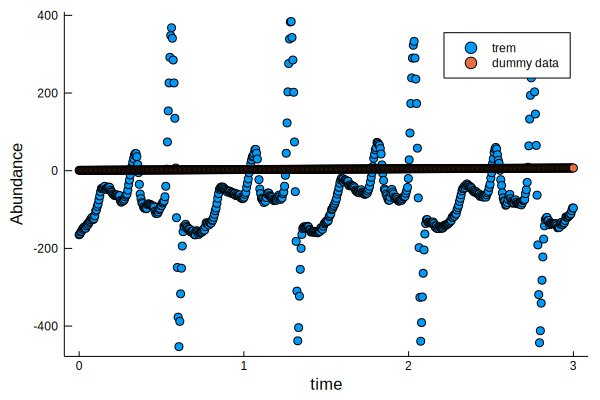

In [7]:
scatter(t, ode_data[1,:], grid = "off", xlab = "time", ylab = "Abundance", label = species1)
scatter!(t, ode_data[2,:], label = species2)

In [8]:
# Building a neural ODE 
# Derivative is modeled by a neural net. Chain concatinates the functions ode function and two dense layers.
dudt = Chain(Dense(2,100,tanh),
       Dense(100,100,tanh),
        Dense(100,100,tanh),
       Dense(100,2))
# Parameters of the model which are to be learnt. They are: W1 (2x50), b1 (50), W2 (50x2), b2 (2)
ps = Flux.params(dudt)
# Getting loss function from two stage collocation function
function node_two_stage_function(model, x, tspan, saveat, ode_data,
            args...; kwargs...)
  dudt_(du,u,p,t) = du .= model(u)
  prob_fly = ODEProblem(dudt_,x,tspan)
  two_stage_method(prob_fly, saveat, ode_data)
end
loss_n_ode = node_two_stage_function(dudt, u0, tspan, t, ode_data, Tsit5(), reltol=1e-7, abstol=1e-9)
#  loss function
two_stage_loss_fct()=loss_n_ode.cost_function(ps)
# Defining anonymous function for the neural ODE with the model. in: u0, out: solution with current params.
n_ode = x->neural_ode(dudt, x, tspan, Tsit5(), saveat=t, reltol=1e-7, abstol=1e-9)
n_epochs = 6000
verify = 25 # for <verify>th epoch the L2 is calculated  
data1 = Iterators.repeated((), n_epochs)
opt1 = ADAM(0.0001)
sa = saver(n_epochs)
L2_loss_fct() = sum(abs2,ode_data .- n_ode(u0))
# Callback function to observe two stage training.
cb1 = function ()
    sa.count_epochs = sa.count_epochs +  1
    if mod(sa.count_epochs-1, verify)==0
        update_saver(sa, Tracker.data(two_stage_loss_fct()),Tracker.data(L2_loss_fct()), Dates.Time(Dates.now()))
        # println("\"",Tracker.data(two_stage_loss_fct()),"\" \"",Dates.Time(Dates.now()),"\";")
    else
        update_saver(sa, Tracker.data(two_stage_loss_fct()),0,Dates.Time(Dates.now()))
        # println("\"",Tracker.data(two_stage_loss_fct()),"\" \"",Dates.Time(Dates.now()),"\";")
    end
end


#7 (generic function with 1 method)

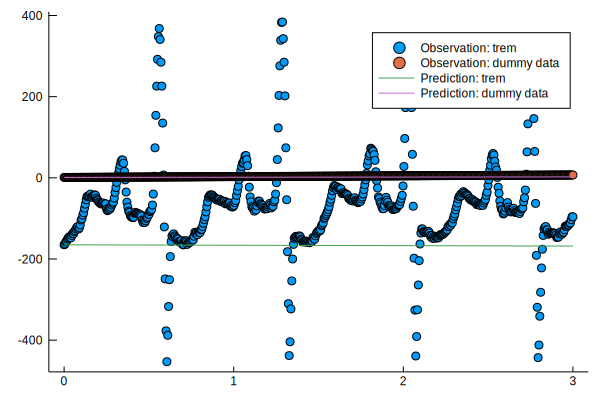

In [9]:
pred = n_ode(u0)
scatter(t, ode_data[1,:], label = string("Observation: ", species1), grid = "off")
scatter!(t, ode_data[2,:], label = string("Observation: ", species2))
plot!(t, Flux.data(pred[1,:]), label = string("Prediction: ", species1))
plot!(t, Flux.data(pred[2,:]), label = string("Prediction: ", species2))

In [ ]:
# train n_ode with collocation method
@time Flux.train!(two_stage_loss_fct, ps, data1, opt1, cb = cb1)


In [ ]:
pred = n_ode(u0)
scatter(t, ode_data[1,:], label = string("Observation "), grid = "off")
scatter!(t, ode_data[2,:], label = string("Observation "))
plot!(t, Flux.data(pred[1,:]), label = string("Prediction "))
plot!(t, Flux.data(pred[2,:]), label = string("Prediction "))


In [ ]:
header = string("col losses: ", sa.times[end] - sa.times[1])
scatter(range(1,stop=length(sa.l2s)),log.(sa.l2s),width  =2, label = "l2s", grid = "off")
plot!(range(1,stop=length(sa.losses)),log.(sa.losses), width  =2, label = header)
# 5% of time even with l2s